In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import nltk
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import TreebankWordTokenizer
plt.style.use('fivethirtyeight')
sns.set()
plt.rcParams['figure.figsize'] = (12,12)

In [2]:
GRAPH = '../Results/Graphs'
TABLE = '..Results/Tables'
DATA = '../data'
VERSION = 11  #1: Merged All 2:Cleaned
# os.listdir(DATA)

In [3]:
df = pd.read_csv(os.path.join(DATA,'Dataset_v'+str(VERSION) + '.csv'))
# ONET = pd.read_csv(os.path.join(DATA,'ONET_Occupations.csv'))
ONET = pd.read_csv(os.path.join(DATA,'Information_Technology.csv'))
skills = pd.read_csv(os.path.join(DATA,'skills.csv'))

In [4]:
START_YR = 2019
END_YR = 2021

In [5]:
skills_df = pd.read_csv('Skills_df.csv')
skills_df.drop(['Unnamed: 0'],axis=1,inplace=True)
# skills_df
skills_df['Name'] = df['Name']
SKILLS = skills_df.columns
skills_df = skills_df[skills_df['Year'].isin([START_YR,END_YR])].reset_index(drop=True)

In [16]:
skills_df

,Database,Networking,Testing & QA,Java,PHP,JavaScript,API,SQL,jQuery,WordPress,...,Spring,Documentation,CCTV,C#,NodeJS,SQL Server,Design Pattern,Year,Title,Name
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2019,Computer Systems Engineers/Architects,BJIT Ltd.
1,1,1,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,2019,Web Developers,BJIT Ltd.
2,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,2019,"Computer Occupations, All Other",Haque Group of Industries
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2019,Project Management Specialists,Haque Group of Industries
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,2019,Software Developers,ABH World
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2021,Computer Systems Engineers/Architects,Elite LifeStyle
11640,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2021,Web and Digital Interface Designers,WhiteShell Limited
11641,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2021,"Computer Occupations, All Other",Amar Skill
11642,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2021,Computer Systems Engineers/Architects,X-Net Ltd.


In [6]:
temp = pd.get_dummies(skills_df['Title'])
SKILLS = temp.columns
temp['Name'] = skills_df['Name']
temp['Year'] = skills_df['Year']


In [7]:
temp = temp.groupby(['Name','Year']).sum()
index = temp.groupby('Name').size() > 1
temp = temp.reset_index()
temp.index = temp.Name
temp = temp[index]
temp =temp.set_index(['Name','Year'],drop=True)

<ipython-input-7-a0d0f758664f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = temp[index]


In [8]:
shift_df = pd.DataFrame(index=temp.columns,columns = temp.columns).fillna(0)
shift_df

,Business Intelligence Analysts,Computer Network Architects,Computer Network Support Specialists,"Computer Occupations, All Other",Computer Systems Analysts,Computer Systems Engineers/Architects,Computer User Support Specialists,Data Warehousing Specialists,Database Administrators,Database Architects,...,Network and Computer Systems Administrators,Project Management Specialists,Search Marketing Strategists,Software Developers,Software Quality Assurance Analysts and Testers,Telecommunications Engineering Specialists,Video Game Designers,Web Administrators,Web Developers,Web and Digital Interface Designers
Business Intelligence Analysts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Computer Network Architects,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Computer Network Support Specialists,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Computer Occupations, All Other",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Computer Systems Analysts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Computer Systems Engineers/Architects,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Computer User Support Specialists,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Data Warehousing Specialists,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Database Administrators,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Database Architects,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
for company in temp.index.get_level_values(0):
    company_df = temp.loc[company]
    for skill1 in company_df.columns:
        if company_df.loc[START_YR,skill1] > 0:
            for skill2 in company_df.columns:
                if company_df.loc[END_YR,skill2] > 0:
                    shift_df.loc[skill1,skill2] += (1 * company_df.loc[END_YR,skill2]) #+ 0.2 * company_df.loc[START_YR,skill1])

In [10]:
shift_df

,Business Intelligence Analysts,Computer Network Architects,Computer Network Support Specialists,"Computer Occupations, All Other",Computer Systems Analysts,Computer Systems Engineers/Architects,Computer User Support Specialists,Data Warehousing Specialists,Database Administrators,Database Architects,...,Network and Computer Systems Administrators,Project Management Specialists,Search Marketing Strategists,Software Developers,Software Quality Assurance Analysts and Testers,Telecommunications Engineering Specialists,Video Game Designers,Web Administrators,Web Developers,Web and Digital Interface Designers
Business Intelligence Analysts,96,4,28,64,6,144,68,6,16,12,...,40,236,14,294,32,78,2,0,76,36
Computer Network Architects,22,4,12,8,0,22,26,0,4,2,...,36,50,4,52,6,18,0,0,8,4
Computer Network Support Specialists,42,6,70,18,12,152,98,10,10,6,...,70,146,26,172,28,74,4,4,80,40
"Computer Occupations, All Other",64,6,38,162,12,166,134,14,22,6,...,52,260,2,298,28,52,2,2,138,36
Computer Systems Analysts,8,0,6,4,22,16,18,2,0,0,...,10,22,2,62,14,0,0,2,8,2
Computer Systems Engineers/Architects,78,12,50,48,18,390,142,20,32,12,...,82,230,22,498,62,130,8,2,162,104
Computer User Support Specialists,64,14,60,70,10,286,186,14,24,14,...,70,214,36,506,44,94,4,2,170,56
Data Warehousing Specialists,16,0,20,4,0,52,22,12,14,4,...,14,28,0,92,14,20,0,0,40,6
Database Administrators,26,0,18,10,0,104,68,8,24,4,...,44,62,6,158,22,28,0,0,60,16
Database Architects,12,0,2,0,0,20,6,2,4,4,...,4,4,2,30,0,16,0,0,6,0


In [14]:
import networkx as nx 
G = nx.DiGraph() 
for i in SKILLS: 
    for j in SKILLS: 
        if shift_df[i][j] >500: 
            G.add_edge(i,j,weight=shift_df[i][j]/100) 

In [15]:
widths = nx.get_edge_attributes(G, 'weight')
np.array(list(widths.values()),dtype=int)

array([ 5,  5,  7, 15,  6,  6,  6])

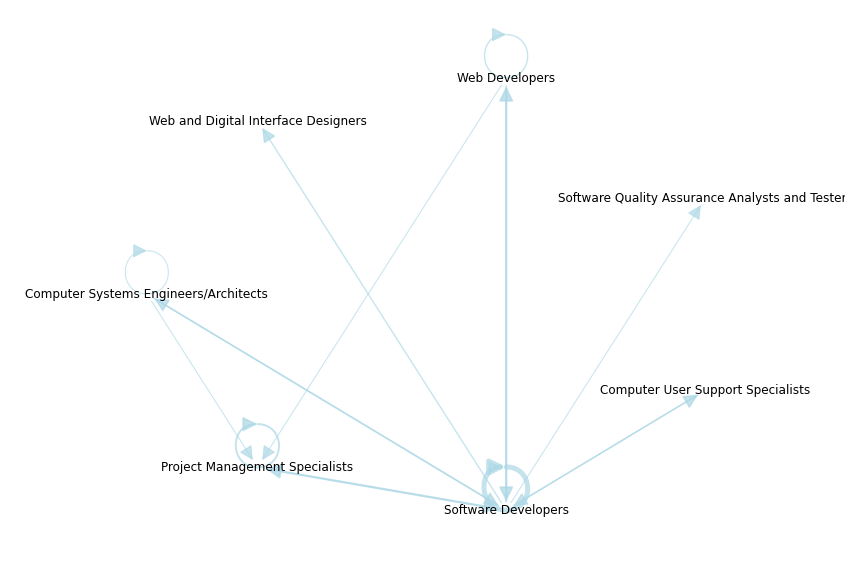

In [13]:

nodelist = G.nodes()

plt.figure(figsize=(12,8))

pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=1500,
                       node_color='lightblue',
                       alpha=0
                      )
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=np.array(list(widths.values()),dtype=int)/3,
                       edge_color='lightblue',
                       alpha=0.7,arrowsize=30)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.tight_layout()

x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)

plt.savefig('JobShift19_21.png',dpi=350)
plt.show()


In [49]:
df['Year'].value_counts()

2021    6074
2019    5570
2018    5323
2017    5275
2016    5038
2020    4245
Name: Year, dtype: int64